In [71]:
# Check if we have a GPU available
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU available. If you're on Colab, go to Runtime > Change runtime and select a GPU hardware accelerator.")

Default GPU Device: /device:GPU:0


In [72]:
def download_file(url, file_path):
    import requests
    r = requests.get(url)
    with open(file_path, 'wb') as f:
        f.write(r.content)

def load_dataset(file_path, fraction=1.0):
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_text = f.read()
    return raw_text[:int(fraction * len(raw_text))]

dataset = 'shakespeare.txt' # Other options are mark_twain.txt, charles_dickens.txt

download_file(f'https://raw.githubusercontent.com/UofT-DSI/deep_learning/refs/heads/main/02_activities/assignments/downloaded_books/' + dataset, dataset)

# Load chosen dataset. NOTE: If Colab is running out of memory, change the `fraction` parameter to a value between 0 and 1 to load less data.
text = load_dataset(dataset, fraction=0.1)

In [73]:
# Print the first 1000 characters of the dataset
print("First 1000 characters of the dataset:")
print(text[:1000])

# Report the dataset's size
dataset_size = len(text)
print("\nDataset size (number of characters):", dataset_size)

# Report the number of unique characters in the dataset
unique_characters = set(text)
unique_characters_count = len(unique_characters)
print("Number of unique characters:", unique_characters_count)

First 1000 characters of the dataset:
The Project Gutenberg EBook of Hamlet, by William Shakespeare

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Hamlet

Author: William Shakespeare

Editor: Charles Kean

Release Date: January 10, 2009 [EBook #27761]

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK HAMLET ***




Produced by David Starner, Curtis Weyant and the Online
Distributed Proofreading Team at https://www.pgdp.net









    Transcriber's Note:
    This is a heavily edited version of _Hamlet_. It was used
    for Charles Kean's 1859 stage production. Phrases printed
    in italics in the book are indicated in this electronic
    version by _ (underscore). Footnotes originally appeared
    at the bottom of each page. For this

In [74]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Specify vocabulary size and out-of-vocabulary token
VOCAB_SIZE = 1000  # You can adjust this value based on your needs
OOV_TOKEN = '<OOV>'

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)

# Convert the entire text to lowercase
text = text.lower()

# Fit the tokenizer on the text
tokenizer.fit_on_texts([text])

# Convert the text to a sequence of numbers
sequences = tokenizer.texts_to_sequences([text])[0]

# Print some information
print("First 100 tokens:", sequences[:100])
print("Number of unique tokens:", len(tokenizer.word_index))

# Optional: Print the word index to see the mapping
print("\nWord index (first 20):", {k: tokenizer.word_index[k] for k in list(tokenizer.word_index)[:20]})


First 100 tokens: [2, 56, 54, 411, 4, 107, 28, 668, 172, 20, 411, 13, 16, 2, 176, 4, 669, 1, 33, 43, 1, 3, 14, 412, 43, 1, 1, 10, 85, 333, 15, 124, 15, 163, 29, 531, 176, 15, 254, 2, 216, 4, 2, 56, 54, 297, 1, 14, 20, 411, 29, 759, 33, 592, 54, 366, 785, 107, 1, 668, 172, 1, 1, 1, 1, 564, 1, 532, 1, 411, 1, 989, 609, 533, 177, 1, 1, 462, 874, 4, 20, 56, 54, 411, 107, 875, 28, 1, 1, 1, 1, 3, 2, 759, 733, 1, 1, 33, 1, 592]
Number of unique tokens: 13218

Word index (first 20): {'<OOV>': 1, 'the': 2, 'and': 3, 'of': 4, 'to': 5, 'a': 6, 'in': 7, 'i': 8, 'that': 9, 'you': 10, 'he': 11, 'his': 12, 'is': 13, 'with': 14, 'it': 15, 'for': 16, 'my': 17, 'was': 18, 'not': 19, 'this': 20}


In [75]:
try:
    print(list(tokenizer.word_index.items())[:10])
except AttributeError:
    print("Tokenizer has not been initialized. Possible issue: Complete the relevant section of the assignment to initialize it."
)

[('<OOV>', 1), ('the', 2), ('and', 3), ('of', 4), ('to', 5), ('a', 6), ('in', 7), ('i', 8), ('that', 9), ('you', 10)]


In [76]:
SEQ_LENGTH = 50  # Choose an appropriate sequence length

# Generate the training sequences
X = []
y = []

for i in range(len(sequences) - SEQ_LENGTH):
    seq_in = sequences[i:i + SEQ_LENGTH]
    seq_out = sequences[i + SEQ_LENGTH]
    X.append(seq_in)
    y.append(seq_out)

# Convert X and y to numpy arrays
import numpy as np
X = np.array(X)
y = np.array(y)

In [77]:
if len(X) > 0 and len(y) > 0:
    print(f'Sequence: {X[0]}\nTarget: {y[0]}')
    print(f'Translated back to words: {[tokenizer.index_word[i] for i in X[0]]} -> {tokenizer.index_word[y[0]]}')
else:
    print("Training sequences have not been generated. Possible issue: Complete the relevant section of the assignment to initialize it.")

Sequence: [  2  56  54 411   4 107  28 668 172  20 411  13  16   2 176   4 669   1
  33  43   1   3  14 412  43   1   1  10  85 333  15 124  15 163  29 531
 176  15 254   2 216   4   2  56  54 297   1  14  20 411]
Target: 29
Translated back to words: ['the', 'project', 'gutenberg', 'ebook', 'of', 'hamlet', 'by', 'william', 'shakespeare', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', '<OOV>', 'at', 'no', '<OOV>', 'and', 'with', 'almost', 'no', '<OOV>', '<OOV>', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', '<OOV>', 'with', 'this', 'ebook'] -> or


In [67]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

# Ensure that tokenizer has been initialized
if tokenizer is not None:
    # Convert X and y to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # One last thing: let's drop any examples where the target is the OOV token - we don't want our model to predict that (boring!)
    if OOV_TOKEN in tokenizer.word_index:
        mask = y != tokenizer.word_index[OOV_TOKEN]
        X = X[mask]
        y = y[mask]

    # One-hot encode the target token
    y = to_categorical(y, num_classes=VOCAB_SIZE)

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f'X_train shape: {X_train.shape}')
    print(f'y_train shape: {y_train.shape}')
else:
    print("Tokenizer has not been initialized. Please initialize it and load the vocabulary before continuing.")

X_train shape: (95673, 50)
y_train shape: (95673, 1000)


In [78]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Define model architecture
model = Sequential([
    # Embedding layer
    Embedding(input_dim=VOCAB_SIZE, output_dim=64, input_length=SEQ_LENGTH),

    # LSTM layer
    LSTM(128, return_sequences=False),

    # Dense layer with softmax activation
    Dense(VOCAB_SIZE, activation='softmax')
])

# Check if the model has layers before trying to print the summary
if len(model.layers) > 0:
    model.summary()
else:
    print("No layers have been added to the model. Please complete the assignment by adding the required layers.")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [79]:
from keras.optimizers import Adam

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Print a summary of the model
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [82]:
from keras.callbacks import ModelCheckpoint

# Split the data into training and validation sets
validation_split = 0.2  # 20% of the data will be used for validation
num_validation_samples = int(validation_split * len(X))
X_train = X[:-num_validation_samples]
y_train = y[:-num_validation_samples]
X_val = X[-num_validation_samples:]
y_val = y[-num_validation_samples:]

# Define a callback to save the model
checkpoint_callback = ModelCheckpoint(filepath='model_checkpoint.keras', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_callback])

# Print a summary of the model
model.summary()

# Print the keys of the training history to see what metrics are available
print("Training history keys:", history.history.keys())




Epoch 1/5
979/979 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2685 - loss: 3.8615 - val_accuracy: 0.2897 - val_loss: 4.0303
Epoch 2/5
979/979 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2705 - loss: 3.8077 - val_accuracy: 0.2922 - val_loss: 4.0195
Epoch 3/5
979/979 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2735 - loss: 3.7696 - val_accuracy: 0.2938 - val_loss: 4.0021
Epoch 4/5
979/979 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2768 - loss: 3.7233 - val_accuracy: 0.2942 - val_loss: 3.9955
Epoch 5/5
979/979 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2793 - loss: 3.6702 - val_accuracy: 0.2945 - val_loss: 4.0026


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 50, 64)              │          64,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1000)                │         129,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875,450 (3.34 MB)

 Trainable params: 291,816 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 583,634 (2.23 MB)

Training history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


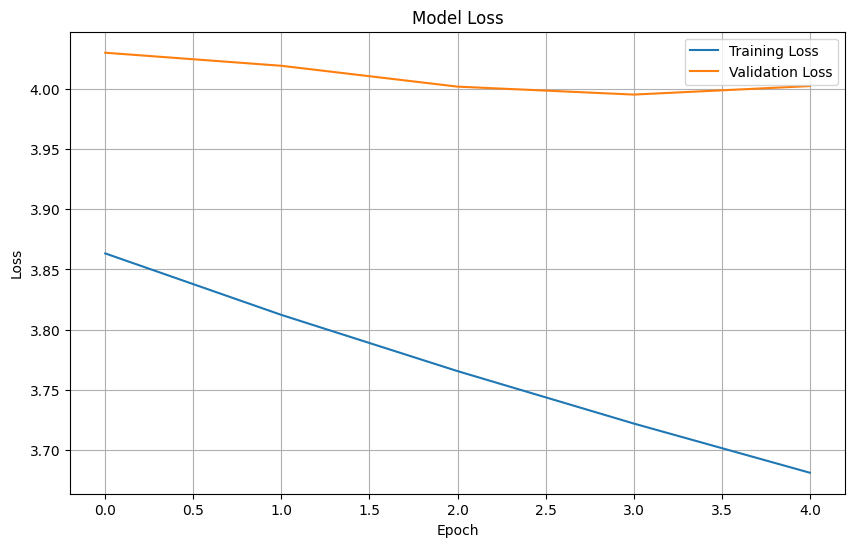

In [83]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [85]:
from keras.preprocessing.sequence import pad_sequences

def get_predicted_word(model, sequence):
    """
    Get the predicted word from the model.
    This helper function uses a concept we haven't covered in class yet: temperature.
    In essence, a little bit of randomness in what word we predict can make the text more interesting.
    """

    # Use the model to predict the next token in the sequence
    yhat = model.predict(sequence, verbose=0)

    # Get the index of the predicted word, according to the probabilities
    yhat = np.random.choice(range(VOCAB_SIZE), p=yhat.ravel())

    return yhat

def generate_text(model, tokenizer, seed_text, max_sequence_len):
    """
    Generate new text using the trained model.
    """
    generated_text = seed_text
    for _ in range(max_sequence_len):
        # Tokenize the seed text
        token_list = tokenizer.texts_to_sequences([generated_text])[0]
        # Pad the sequences to the same length as the training sequences
        token_list = pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')
        # Predict the next token
        predicted_token = get_predicted_word(model, token_list)
        # Convert the predicted token to a word
        predicted_word = tokenizer.index_word[predicted_token]
        # Append the word to the seed text
        generated_text += " " + predicted_word

        # Optionally print the word to see the generation process in real time
        print(predicted_word, end=" ")

    return generated_text


in he’s king mir ha ho <OOV> your daughter pros you am <OOV> to <OOV> oph ii what it goes of it ham the phrase <OOV> dro vi queen no gonzalo the <OOV> to rosalind <OOV> to see it are a <OOV> holy love <OOV> this fine <OOV> stage <OOV> 
Generated text:
 hamlet in he’s king mir ha ho <OOV> your daughter pros you am <OOV> to <OOV> oph ii what it goes of it ham the phrase <OOV> dro vi queen no gonzalo the <OOV> to rosalind <OOV> to see it are a <OOV> holy love <OOV> this fine <OOV> stage <OOV>


In [86]:
# Test the text generation function
generated_text = generate_text(model, tokenizer, 'hamlet', SEQ_LENGTH)
print("\nGenerated text:\n", generated_text)

o enter a <OOV> <OOV> off thy <OOV> <OOV> the <OOV> of his mind soft <OOV> this <OOV> <OOV> <OOV> near that my father's <OOV> leave your <OOV> pros thy good <OOV> and the <OOV> <OOV> are you this is <OOV> <OOV> were been that speak adr or 1st 1 
Generated text:
 hamlet o enter a <OOV> <OOV> off thy <OOV> <OOV> the <OOV> of his mind soft <OOV> this <OOV> <OOV> <OOV> near that my father's <OOV> leave your <OOV> pros thy good <OOV> and the <OOV> <OOV> are you this is <OOV> <OOV> were been that speak adr or 1st 1


In [87]:
!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip glove.6B.zip

--2024-12-04 23:56:47--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.00MB/s    in 2m 39s  

2024-12-04 23:59:26 (5.18 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [88]:
# Load the pre-trained embeddings
embeddings_index = {}
try:
    with open('glove.6B.100d.txt', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print(f'Found {len(embeddings_index)} word vectors.')
except FileNotFoundError:
    print("'glove.6B.100d.txt' File not found. Please make sure you have ran the previous cell.")

Found 400000 word vectors.


In [90]:
# Check if VOCAB_SIZE is set
if VOCAB_SIZE is None:
    print("You need to complete the previous parts of your assignment in order for this to work.")
else:
    # Create an embedding matrix
    embedding_matrix = np.zeros((VOCAB_SIZE, 100))
    for word, i in tokenizer.word_index.items():
        if i < VOCAB_SIZE:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector

In [91]:
# Check if VOCAB_SIZE is set
if VOCAB_SIZE is None:
    print("You need to complete the previous parts of your assignment in order for this to work.")
else:
    embedding_layer = Embedding(
        VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=SEQ_LENGTH, trainable=False
    )

In [92]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam

# Define a new model
model = Sequential([
    # Pre-trained embedding layer
    embedding_layer,

    # LSTM layer with dropout
    LSTM(128, return_sequences=True),
    Dropout(0.2),

    # Another LSTM layer
    LSTM(128),
    Dropout(0.2),

    # Dense layer with softmax activation
    Dense(VOCAB_SIZE, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │         100,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,000 (390.62 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 100,000 (390.62 KB)

In [93]:
from keras.callbacks import ModelCheckpoint

# Split the data into training and validation sets
validation_split = 0.2  # 20% of the data will be used for validation
num_validation_samples = int(validation_split * len(X))
X_train = X[:-num_validation_samples]
y_train = y[:-num_validation_samples]
X_val = X[-num_validation_samples:]
y_val = y[-num_validation_samples:]

# Define a callback to save the model
checkpoint_callback = ModelCheckpoint(filepath='refined_model_checkpoint.keras', save_best_only=True)

# Train the refined model
history = model.fit(X_train, y_train,
                    epochs=10,  # Train for longer
                    batch_size=64,  # Experiment with smaller batch size
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_callback])

# Print the keys of the training history to see what metrics are available
print("Training history keys:", history.history.keys())


Epoch 1/10
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.2291 - loss: 5.0029 - val_accuracy: 0.2596 - val_loss: 4.4424
Epoch 2/10
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.2330 - loss: 4.4632 - val_accuracy: 0.2650 - val_loss: 4.2626
Epoch 3/10
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.2383 - loss: 4.2556 - val_accuracy: 0.2747 - val_loss: 4.1440
Epoch 4/10
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.2447 - loss: 4.1226 - val_accuracy: 0.2766 - val_loss: 4.0908
Epoch 5/10
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.2462 - loss: 4.0626 - val_accuracy: 0.2792 - val_loss: 4.0523
Epoch 6/10
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.2520 - loss: 3.9880 - val_accuracy: 0.2818 - val_loss: 4.0354
Epoch 7/10
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 46s 13ms/step - accuracy: 0.2546 - loss: 3.9356 - val_accuracy: 0.2839 - val_loss: 4.0051
Epoch 8/10
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - accuracy: 0.2567 -

In [94]:
# Test the text generation function
generated_text = generate_text(model, tokenizer, 'hamlet', SEQ_LENGTH)
print("\nGenerated text:\n", generated_text)

<OOV> <OOV> <OOV> things <OOV> <OOV> <OOV> it <OOV> and paid these her seems <OOV> or <OOV> such <OOV> <OOV> <OOV> <OOV> and <OOV> <OOV> with a poor <OOV> <OOV> as <OOV> being by <OOV> making <OOV> round to <OOV> the <OOV> and miranda his <OOV> word the devil has 
Generated text:
 hamlet <OOV> <OOV> <OOV> things <OOV> <OOV> <OOV> it <OOV> and paid these her seems <OOV> or <OOV> such <OOV> <OOV> <OOV> <OOV> and <OOV> <OOV> with a poor <OOV> <OOV> as <OOV> being by <OOV> making <OOV> round to <OOV> the <OOV> and miranda his <OOV> word the devil has
